Hello, my name is Alexander Gonzalez and in this project we will be web scrapping paragraphs from the Xbox wikipedia page, and we will be working with the words we can pull from this webpage.

In [1]:
import requests # to get the html source code of the page
from bs4 import BeautifulSoup # to parse the html source code
import re # to use regular expressions
from nltk.corpus import stopwords # to remove stopwords
from nltk.stem import PorterStemmer # to stem words to their root form (Example: running -> run)
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

### Download mltk data

In [2]:
# Preprocess the text (remove punctuation and stopwords)
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Fetch and Parse HTML

In [3]:
url = "https://en.wikipedia.org/wiki/Xbox"
response = requests.get(url)
html_content = response.content
soup = BeautifulSoup(html_content, 'html.parser')

### Extracing the data

In [4]:
# Example: Extracting all paragraphs
paragraphs = soup.find_all('p')
# Extracting text from each paragraph
paragraph_texts = [paragraph.get_text() for paragraph in paragraphs]

### Text Preprocessing

In [5]:
# Remove special characters using regex
cleaned_text = [re.sub(r'[^a-zA-Z0-9\s]', '', text) for text in paragraph_texts]

# Tokenization
tokenized_text = [word_tokenize(text) for text in cleaned_text]

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in tokens if word not in stop_words] for tokens in tokenized_text]

In [6]:
# Remove empty tokens
final_text = [[word for word in tokens if word.strip()] for tokens in filtered_text]

# Convert tokens back to sentences
sentences = [' '.join(tokens) for tokens in final_text]

In [7]:
# Convert sentences back to paragraphs
processed_paragraphs = '\n\n'.join(sentences)

### Save the Proprocess

In [8]:
with open('processed_text.txt', 'w', encoding='utf-8') as file:
    file.write(processed_paragraphs)
    
print(processed_paragraphs)



Xbox video gaming brand created owned Microsoft The brand consists five video game consoles well applications games streaming service Xbox Cloud Gaming online services Xbox network Xbox Game Pass development arm Xbox Game Studios The brand first introduced United States November 2001 launch original Xbox console

The original device first video game console offered American company Atari Jaguar stopped sales 1996 It reached 24 million units sold May 20061 Microsofts second console Xbox 360 released 2005 sold 86 million units October 2021 The third console Xbox One released November 2013 sold 58 million units2 The fourth line Xbox consoles Xbox Series X Series S released November 2020 The head Xbox Phil Spencer succeeded former head Marc Whitten late March 201434

When Sony Computer Entertainment first announced PlayStation 2 1999 company positioned console centerpiece home entertainment would play video games also could play audio CDs video DVDs Microsoft whose business primarily sup

In [9]:
# Split the text into sentences keeping the original format
original_sentences = processed_paragraphs.strip().split('.')

# Now 'original_sentences' is an array of text
print(original_sentences)

['Xbox video gaming brand created owned Microsoft The brand consists five video game consoles well applications games streaming service Xbox Cloud Gaming online services Xbox network Xbox Game Pass development arm Xbox Game Studios The brand first introduced United States November 2001 launch original Xbox console\n\nThe original device first video game console offered American company Atari Jaguar stopped sales 1996 It reached 24 million units sold May 20061 Microsofts second console Xbox 360 released 2005 sold 86 million units October 2021 The third console Xbox One released November 2013 sold 58 million units2 The fourth line Xbox consoles Xbox Series X Series S released November 2020 The head Xbox Phil Spencer succeeded former head Marc Whitten late March 201434\n\nWhen Sony Computer Entertainment first announced PlayStation 2 1999 company positioned console centerpiece home entertainment would play video games also could play audio CDs video DVDs Microsoft whose business primarily

In [10]:
len(sentences)

58

In [11]:
def preprocess_text(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalnum()]
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [12]:
def preprocess_text(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Replace non-alphabetical characters with spaces using regular expression
    cleaned_sentence = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize the cleaned sentence into words
    cleaned_words = word_tokenize(cleaned_sentence)

    # Convert words to lowercase, filter out non-alphabetical characters, and remove stop words
    cleaned_words = [word.lower() for word in cleaned_words if word.isalnum() and word not in stop_words]

    # Join the cleaned words back into a single string
    return ' '.join(cleaned_words)

In [13]:
preprocessed_sentences = []
for sentence in sentences:
    preprocessed_sentence = preprocess_text(sentence)
    preprocessed_sentences.append(preprocessed_sentence)

In [14]:
print(sentences)

['', 'Xbox video gaming brand created owned Microsoft The brand consists five video game consoles well applications games streaming service Xbox Cloud Gaming online services Xbox network Xbox Game Pass development arm Xbox Game Studios The brand first introduced United States November 2001 launch original Xbox console', 'The original device first video game console offered American company Atari Jaguar stopped sales 1996 It reached 24 million units sold May 20061 Microsofts second console Xbox 360 released 2005 sold 86 million units October 2021 The third console Xbox One released November 2013 sold 58 million units2 The fourth line Xbox consoles Xbox Series X Series S released November 2020 The head Xbox Phil Spencer succeeded former head Marc Whitten late March 201434', 'When Sony Computer Entertainment first announced PlayStation 2 1999 company positioned console centerpiece home entertainment would play video games also could play audio CDs video DVDs Microsoft whose business prima

In [15]:
# Calculate TF-IDF scores
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(sentences)
tfidf_scores = tfidf_matrix.sum(axis=1)

In [16]:
# Find the most important sentences based on TF-IDF scores
top_sentence_indices = np.argsort(tfidf_scores, axis=0)[-10:]

In [17]:
top_sentence_indices

matrix([[ 8],
        [45],
        [54],
        [11],
        [19],
        [ 4],
        [ 9],
        [ 7],
        [ 6],
        [15]], dtype=int64)

In [18]:
sentences[8]

'The integrated Xbox Live service launched November 2002 allowed players play games online broadband connection20 It first competed Dreamcasts online service later primarily competed PlayStation 2s online service Although two competing services free Xbox Live required subscription well broadbandonly connection completely adopted yet Xbox Live success due better servers features buddy list milestone titles Halo 2 released November 2004 became bestselling Xbox video game far popular online game original Xbox system'

In [19]:
my_sentence =sentences[8]

In [20]:
top_sentences = []

for index in range(len(top_sentence_indices)):
    val = sentences[index]

    # Join the top sentences to create the summary
    summary = ''.join(val) +  '.'

    print(summary)

.
Xbox video gaming brand created owned Microsoft The brand consists five video game consoles well applications games streaming service Xbox Cloud Gaming online services Xbox network Xbox Game Pass development arm Xbox Game Studios The brand first introduced United States November 2001 launch original Xbox console.
The original device first video game console offered American company Atari Jaguar stopped sales 1996 It reached 24 million units sold May 20061 Microsofts second console Xbox 360 released 2005 sold 86 million units October 2021 The third console Xbox One released November 2013 sold 58 million units2 The fourth line Xbox consoles Xbox Series X Series S released November 2020 The head Xbox Phil Spencer succeeded former head Marc Whitten late March 201434.
When Sony Computer Entertainment first announced PlayStation 2 1999 company positioned console centerpiece home entertainment would play video games also could play audio CDs video DVDs Microsoft whose business primarily sup

In [21]:
from textblob import TextBlob

# Create a TextBlob object with the text
blob = TextBlob(processed_paragraphs)

# Translate the text to Spanish
translated_blob = blob.translate('en', 'es')

# Print the translated text
print(translated_blob)

Marca de videojuegos de Xbox creado Microsoft Microsoft La marca consiste en cinco consolas de videojuegos Aplicaciones Servicio de transmisión de juegos Xbox Cloud Gaming Servicios en línea Xbox Network Xbox Pass Desarrollo de juego Xbox Game Studios La marca Presentada por primera vez en los Estados Unidos Noviembre 2001 Lanzamiento de Xbox Console Original Xbox

La primera consola de videojuegos del dispositivo original ofreció a la compañía estadounidense Atari Jaguar detuvo las ventas de 1996, alcanzó los 24 millones de unidades vendidas en mayo de 20061, la segunda consola de Microsofts, Xbox 360, lanzada 2005 vendió 86 millones de unidades de octubre de 2021, la tercera consola Xbox One lanzada por noviembre de 2013 vendió 58 millones de unidades 2, la cuarta, la cuarta, la cuarta. Línea Xbox Consols Xbox Series X Series s lanzada en noviembre de 2020 The Head Xbox Phil Spencer sucedió al ex jefe Marc Whitten a fines de marzo de 201434

Cuando Sony Computer Entertainment anunció

### Visualize

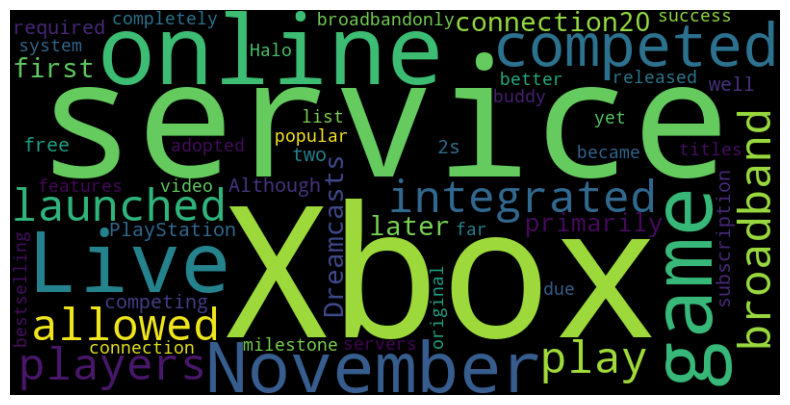

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(my_sentence)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [23]:
import spacy
nlp = spacy.load('en_core_web_sm')
# Import the displaCy library
from spacy import displacy

In [24]:
doc = nlp(my_sentence)
displacy.render(doc, style='ent', jupyter=True)

### POS

In [25]:
words = word_tokenize(my_sentence)

In [26]:
nltk.pos_tag(words)

[('The', 'DT'),
 ('integrated', 'JJ'),
 ('Xbox', 'NNP'),
 ('Live', 'NNP'),
 ('service', 'NN'),
 ('launched', 'VBD'),
 ('November', 'NNP'),
 ('2002', 'CD'),
 ('allowed', 'VBD'),
 ('players', 'NNS'),
 ('play', 'VBP'),
 ('games', 'NNS'),
 ('online', 'JJ'),
 ('broadband', 'NN'),
 ('connection20', 'NN'),
 ('It', 'PRP'),
 ('first', 'RB'),
 ('competed', 'VBD'),
 ('Dreamcasts', 'NNP'),
 ('online', 'NN'),
 ('service', 'NN'),
 ('later', 'RB'),
 ('primarily', 'RB'),
 ('competed', 'VBN'),
 ('PlayStation', 'NNP'),
 ('2s', 'CD'),
 ('online', 'NN'),
 ('service', 'NN'),
 ('Although', 'IN'),
 ('two', 'CD'),
 ('competing', 'VBG'),
 ('services', 'NNS'),
 ('free', 'JJ'),
 ('Xbox', 'NNP'),
 ('Live', 'NNP'),
 ('required', 'VBN'),
 ('subscription', 'NN'),
 ('well', 'RB'),
 ('broadbandonly', 'RB'),
 ('connection', 'NN'),
 ('completely', 'RB'),
 ('adopted', 'VBN'),
 ('yet', 'RB'),
 ('Xbox', 'NNP'),
 ('Live', 'NNP'),
 ('success', 'NN'),
 ('due', 'JJ'),
 ('better', 'JJR'),
 ('servers', 'NNS'),
 ('features', 'NNS

In [27]:
#Import required libraries :
from nltk.probability import FreqDist
#Find the frequency :
fdist = FreqDist(words)

In [28]:
#Print 10 most common words :
fdist.most_common(5)

[('Xbox', 5), ('online', 4), ('Live', 3), ('service', 3), ('November', 2)]

In [29]:
#Plot the graph for fdist :
%matplotlib inline

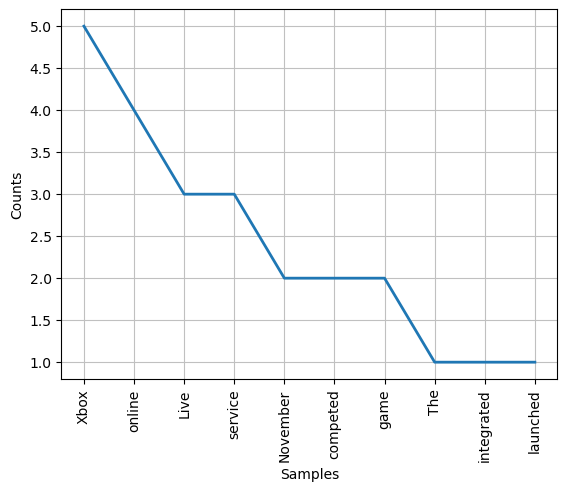

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
fdist.plot(10)

In [31]:
colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PRODUCT': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG'], 'colors':colors}

displacy.render(doc, style='ent', jupyter=True, options=options)